<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Dublin*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## *Dublin* aos olhos de um maiores portais de intercâmbio - [edublin](https://www.edublin.com.br/)

"A capital irlandesa, além de bonita e amigável, tem lugares muito especiais e, até, curiosos, como o Temple Bar, uma região inteira dedicada aos famosos pubs (bares) no coração turístico da cidade.

Entretanto, com mais de 1 milhão de habitantes, Dublin apresenta muitas outras curiosidades, além de recepcionar um número expressivo de estudantes do mundo todo.

A rica cultura irlandesa pode ser facilmente notada por meio da riqueza histórica, na arte, na música e nos livros de muitos autores famosos, que levam a cultura irlandesa para todo o mundo."

Clique no link para ter acesso ao conteúdo completo: https://www.edublin.com.br/9-curiosidades-interessantes-sobre-dublin/

**Neste *notebook*, iremos analisar os dados referentes à cidade Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**



## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [11]:
# importar o arquivo listings.csv para um DataFrame
pd.options.display.float_format = '{:.5f}'.format # suprimindo notação científica
df = pd.read_csv("http://data.insideairbnb.com/ireland/leinster/dublin/2021-07-07/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* **id:** código único do imóvel/oferta
* **name:** descrição do anúncio/imóvel
* **host_id:** código único do anunciante
* **host_name:** nome do anunciante
* **neighbourhood_group:** coluna sem valor
* **neighbourhood:** bairro do imóvel/oferta
* **latitude:** latitude do imóvel/oferta
* **longitude:** longitude do imóvel/oferta
* **room_type:** tipo de acomodação
* **minimum_nights:** quantidade mínima de noites para reserva
* **number_of_reviews:** número de 'reviews' que o imóvel/oferta recebeu
* **last_review:** data do último 'review' recebido
* **reviews_per_month:** quantidade de reviews por mês
* **calculated_host_listings_count:** número de imóveis do anunciante
* **availability_365:** disponibilidade do imóvel/oferta

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,nan,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,50,3,227,2020-02-08,1.88000,3,217
1,85148,Habitación en Dublín Double room,466111,Don,nan,South Dublin,53.29885,-6.31850,Private room,30,1,1,2019-05-11,0.04000,1,284
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,nan,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,63,3,182,2020-02-09,2.26000,3,312
3,159889,Friendly Single Room,766611,Margaret,nan,Dublin City,53.39027,-6.23547,Private room,38,2,311,2019-12-21,3.58000,3,344
4,162809,5.5 miles south of Dublin City :^),777681,Robbie,nan,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,65,1,284,2020-02-09,3.90000,2,286


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
df.shape[0]


7740

In [7]:
# identificar as diferentes variáveis do DataFrame
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


neighbourhood_group              1.00000
reviews_per_month                0.24509
last_review                      0.24509
host_name                        0.04289
name                             0.00013
availability_365                 0.00000
calculated_host_listings_count   0.00000
number_of_reviews                0.00000
minimum_nights                   0.00000
price                            0.00000
room_type                        0.00000
longitude                        0.00000
latitude                         0.00000
neighbourhood                    0.00000
host_id                          0.00000
id                               0.00000
dtype: float64


Uma vez que a variável neighbourhood_group possui 100% dos valores ausentes, podemos excluí-la.

In [ ]:
df = df.drop(columns=['neighbourhood_group'])


### **Q3. Qual o tipo de distribuição das variáveis?** 



*   Lembrando que devemos desconsiderar anomalias nas distribuições das variáveis 'id', 'host_id', 'latitude' e 'longitude'.
*   'price', 'minimum_nights' e 'calculated_host_listings_count' apontam anomalias causadas possívelmente por *outliers*






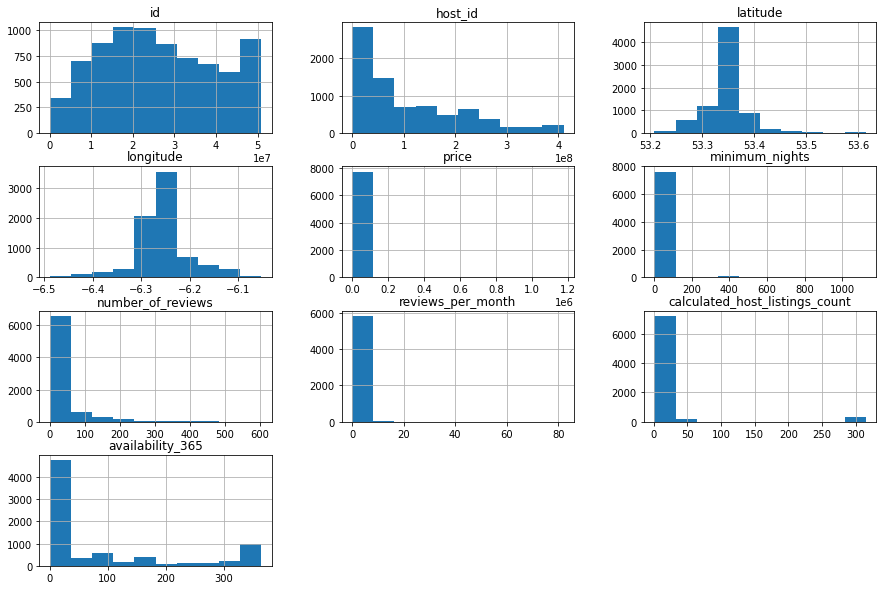

In [13]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [52]:
# ver a média da coluna `price`
df['price'].describe()

count      7740.00000
mean        270.20401
std       13341.30176
min           0.00000
25%          51.00000
50%          80.00000
75%         133.00000
max     1173721.00000
Name: price, dtype: float64

In [53]:
# média das colunas qualitativas
df[['price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7740.00000,7740.00000,7740.00000,5843.00000,7740.00000,7740.00000
mean,270.20401,9.17791,28.88876,0.97169,16.37571,84.81176
std,13341.30176,43.49307,57.53551,1.75726,61.89064,128.05097
min,0.00000,1.00000,0.00000,0.01000,1.00000,0.00000
25%,51.00000,1.00000,1.00000,0.11000,1.00000,0.00000
50%,80.00000,2.00000,5.00000,0.41000,1.00000,0.00000
75%,133.00000,3.00000,27.00000,1.26000,3.00000,143.00000
max,1173721.00000,1125.00000,605.00000,82.00000,315.00000,365.00000


## **Q4. Existem outliers influenciando a distribuição das variáveis?**
Índicios de *outliers*:
1.   Alto desvio padrão (levando em conta a grandeza da métrica).
2.   Grande diferença entre média e mediana.
3.   Valor máximo muito acima da mediana e terceiro percentil (75%).


price: valores acima de 500:
107 entradas
1.3824%


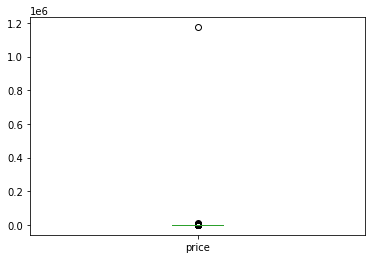

In [25]:
df['price'].plot(kind="box");

# ver quantidade de valores acima de 500 para price
print("price: valores acima de 500:")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

minimum_nights: valores acima de 7:
911 entradas
11.7700%


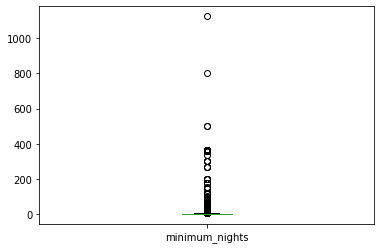

In [38]:
df['minimum_nights'].plot(kind="box");

# ver quantidade de valores acima de 7 para minimum_nights
print("minimum_nights: valores acima de 7:")
print("{} entradas".format(len(df[df.minimum_nights > 7])))
print("{:.4f}%".format((len(df[df.minimum_nights > 7]) / df.shape[0])*100))

minimum_nights: valores acima de 10:
919 entradas
11.8734%


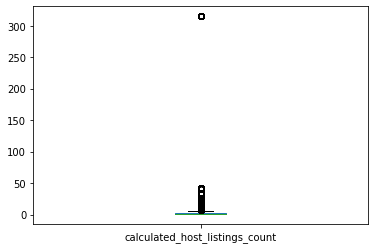

In [39]:
df['calculated_host_listings_count'].plot(kind="box");

# ver quantidade de valores acima de 10 para calculated_host_listings_count
print("minimum_nights: valores acima de 10:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 10])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 10]) / df.shape[0])*100))

## **Definição dos limites para limpeza de outliers:**
*   **price**: aproximadamente o dobro da média.
*   **minimum_nights**: por definição dificilmente teríamos um mínimo superior ao período de uma semana.
*   **calculated_host_listings**: definição de um máximo de 10 anúncios por user_id.





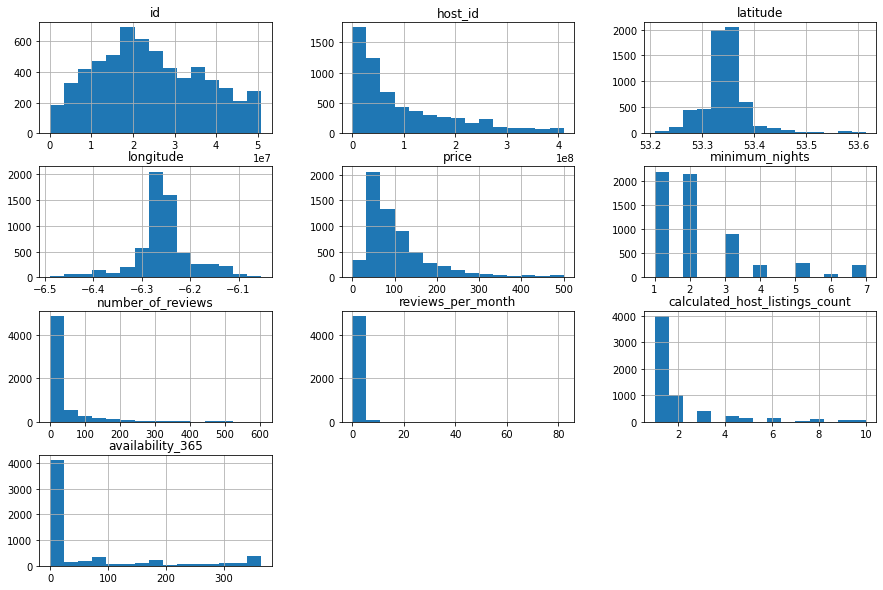

In [29]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 7].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 10].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Com a limpeza do DataFrame reduzimos o tamanho em aproximadamente 22% com uma dimensionalidade de 6102 linhas.

In [44]:
print(df_clean.shape[0] / df.shape[0])
print(df_clean.shape[0])

0.7883720930232558
6102


In [66]:
# média das colunas qualitativas
df_clean[['price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6102.00000,6102.00000,6102.00000,4928.00000,6102.00000,6102.00000
mean,106.45051,2.27024,30.14487,0.93673,1.88332,62.94772
std,82.84402,1.50295,59.04989,1.77165,1.76226,111.40013
min,0.00000,1.00000,0.00000,0.01000,1.00000,0.00000
25%,50.00000,1.00000,1.00000,0.10000,1.00000,0.00000
50%,80.00000,2.00000,6.00000,0.37000,1.00000,0.00000
75%,130.00000,3.00000,28.00000,1.17000,2.00000,88.00000
max,500.00000,7.00000,605.00000,82.00000,10.00000,365.00000


### **Q4. Qual a correlação existente entre as variáveis**

In [64]:
# criar uma matriz de correlação
matrix = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365',]].corr()

# mostrar a matriz de correlação
matrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.00000,0.17478,-0.06227,-0.05213,0.02800,0.05021
minimum_nights,0.17478,1.00000,-0.10281,-0.11760,-0.04546,-0.05142
number_of_reviews,-0.06227,-0.10281,1.00000,0.63072,0.07888,0.14138
reviews_per_month,-0.05213,-0.11760,0.63072,1.00000,0.13030,0.15857
calculated_host_listings_count,0.02800,-0.04546,0.07888,0.13030,1.00000,0.21784
availability_365,0.05021,-0.05142,0.14138,0.15857,0.21784,1.00000


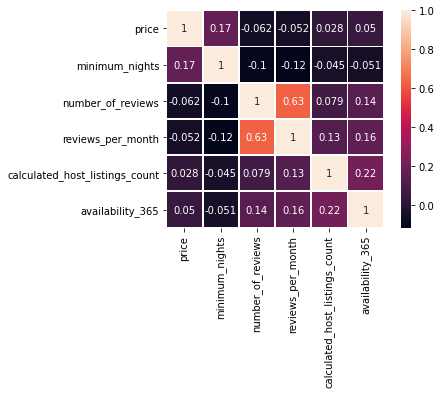

In [65]:
# plotar um heatmap a partir das correlações
sns.heatmap(matrix, square=True, annot=True, linewidths=.9);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [56]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Private room       3257
Entire home/apt    2692
Shared room         108
Hotel room           45
Name: room_type, dtype: int64

In [48]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / df_clean.shape[0]

Private room      0.53376
Entire home/apt   0.44117
Shared room       0.01770
Hotel room        0.00737
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [71]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean()

neighbourhood
Dn Laoghaire-Rathdown   108.44284
Dublin City             110.55428
Fingal                   89.40429
South Dublin             71.12088
Name: price, dtype: float64

In [73]:
# ver preços por bairros e tipo de locação, na média
df_clean.groupby(['neighbourhood','room_type']).price.mean()

neighbourhood          room_type      
Dn Laoghaire-Rathdown  Entire home/apt   156.78042
                       Private room       62.49856
                       Shared room        58.85714
Dublin City            Entire home/apt   156.70909
                       Hotel room        166.95349
                       Private room       70.31269
                       Shared room        44.21111
Fingal                 Entire home/apt   153.59296
                       Hotel room        110.00000
                       Private room       57.43108
                       Shared room        79.83333
South Dublin           Entire home/apt   136.07576
                       Private room       49.73267
                       Shared room        77.80000
Name: price, dtype: float64

In [76]:
# ver quantidade de ofertas por bairros e tipo de locação, na média
df_clean.groupby(['neighbourhood','room_type']).price.count()

neighbourhood          room_type      
Dn Laoghaire-Rathdown  Entire home/apt     337
                       Private room        347
                       Shared room           7
Dublin City            Entire home/apt    2090
                       Hotel room           43
                       Private room       2309
                       Shared room          90
Fingal                 Entire home/apt     199
                       Hotel room            2
                       Private room        399
                       Shared room           6
South Dublin           Entire home/apt      66
                       Private room        202
                       Shared room           5
Name: price, dtype: int64

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe68314ea50>,)

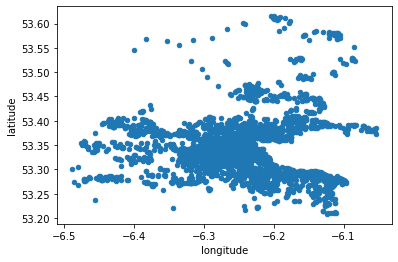

In [50]:
# plotar os imóveis pela latitude-longitude
df_clean.plot.scatter(x='longitude',y='latitude'),

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [51]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].describe()

count   6102.00000
mean       2.27024
std        1.50295
min        1.00000
25%        1.00000
50%        2.00000
75%        3.00000
max        7.00000
Name: minimum_nights, dtype: float64

## Conclusões


Se você está pensando em ir pra Dublin como seu próximo destino de viagem, aqui você encontra algumas dicas para preparar o bolso e sua mochila:

1.   **Preço**: 
O preço médio da pernoite fica na casa de EUR 106,45. Lembrando que você irá encontrar variação entre os diferentes bairros, por exemplo: 
*   Dublin City: EUR 110,55
*   Dn Laoghaire-Rathdown: EUR 108,44
*   Fingal: EUR 89,40
*   South Dublin: EUR 71,12

> Com exceção de Dublin City, todas as outras regiões são conhecidas como condados e são parecidas com as nossas regiões metropolitanas no Brasil.

2.   **Acomodações**:
Você não irá encontrar muita variedade no que diz respeito aos tipos de acomodações. 97% das ofertas estão dentro das categorias 'Private room' e 'Entire home/apt', se você busca um quarto de hotel ('hotel room') sugiro destreza na procura, uma vez que você só encontrará 45 opções (43 delas se encontram em Dublin City).

3.   **Número mínimo de dias para locação**:
Nesse quesito a cidade não se distancia do resto do mundo, em 75% dos casos você encontrará restrição mínima de 3 dias.

**Algumas outras dicas para encontrar as melhores ofertas**:
*   Se você busca por melhores preços, procure pelas ofertas com maior número de avaliações. (encontramos uma correlação negativa entre preço e número de reviews!)
*   Quanto menor o número mínimo de dias para pernoite menor o preço.
*   Outra curiosidade, quanto mais ofertas o host possui maior o preço. Por tanto, meu amigo, fique de olho em que te oferece uma cama.
*   E por último, não se esqueça de levar agasalho impermeável...Dublin é conhecida pela chuva com vento: https://www.youtube.com/watch?v=xqzaGBr8mQU












